In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw

In [2]:
def rectangle(a, b, N):
    h = (b-a) / N

    A = 0.
    for k in range(N):
        A += f(a + k*h) * h
        
    return A

def trapz(a, b, N):
    h = (b-a) / N
    
    # define part of integral not in loop
    s = 0.5 * ( f(a) + f(b) )
    
    # loop to add slices to existing variable 
    for k in range(1, N):
        s += f(a + k*h)
    
    return h*s

def simps(a, b, N):
    h = (b-a) / N
    
    s = f(a) + f(b)
    
    # odd terms
    for k in range(1, N, 2):
        s += 4 * f(a + k*h)
    
    # even terms
    for k in range(2, N, 2):
        s += 2 * f(a + k*h)
    
    return (1/3)*h*s

In [4]:
N=10
# can also sum even odd terms with
x = np.linspace(0,2, N+1)
odd = x[1::2]
even = x[2::2]

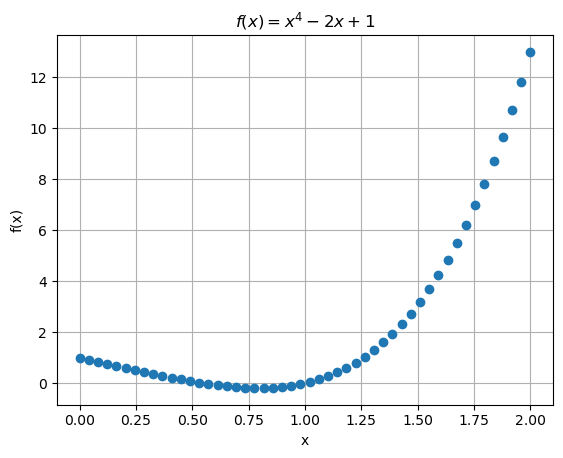

In [8]:
# test function
def f(x):
    return x**4 - 2*x + 1

x = np.linspace(0,2,50)
y = [f(i) for i in x]

plt.plot(x,y,'o')
plt.title('$f(x)=x^4 -2x+1$')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()
plt.show()

In [21]:
# using my three written rules
a = 0.
b = 2.
N = int(1e7)
print('N =',N)
print('Rectanglular =', rectangle(a,b,N))
print('Trapezoidal =', trapz(a,b,N))
print('Simpsons =', simps(a,b,N))

N = 10000000
Rectanglular = 4.399998799999957
Trapezoidal = 4.39999999999998
Simpsons = 4.400000000000126


In [31]:
# using gaussian quadrature
n = 3

# calculate sample points and weights, then map to required domain
x, w = gaussxw(n)
xp = 0.5*(b-a)*x + 0.5*(b-a)
wp = 0.5*(b-a)*w

# integrate f(x)
s = 0.0
for k in range(n):
    s += wp[k] * f(xp[k])
print(s)

4.4000000000000075


In [32]:
# using np.trapz
x = np.linspace(a,b,N)
y = [f(x0) for x0 in x]
print(np.trapz(y,x))

4.400010688030972


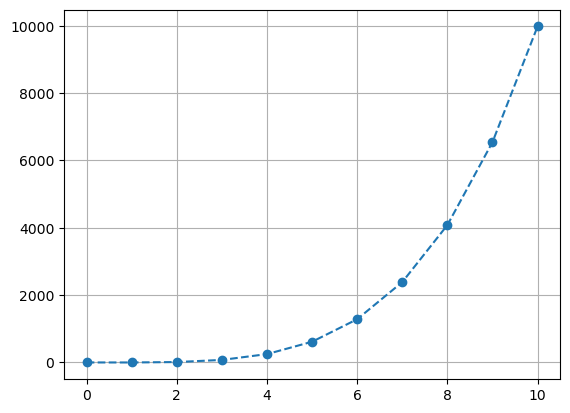

In [49]:
def f(x):
    return x**4 - 2*x + 1

x = np.arange(11)
# x = np.linspace(0,2.,100)
y = [f(i) for i in x]

plt.plot(x,y, 'o--')
plt.grid()
plt.show()

In [44]:
def sampled_rect(y):
    # number of chunks (N)
    # one less than number of sample points
    N = len(y)-1
    
    # calculate h from N and array
    # and first/last array index
    h = (y[-1] - y[0]) / N
    
    # initialize area variable at 0
    A = 0.
    for k in range(N):
        A += y[k] * h
        
    return A

# similar to trapz, but modified like sampled_rect
def sampled_trapz(y):
    N = len(y)-1
    h = (y[-1] - y[0]) / N

    s = 0.5 * (y[0] + y[-1])

    for k in range(1, N):
        s += y[k]

    return s*h

In [50]:
print(np.trapz(y,x))
print(sampled_rect(y))
print(sampled_trapz(y))

20243.0
15222494.0
20202514.0
